# Hand Gesture Recognition
### **Machine Learning Project** - Alice Devilder

#### **Introduction**

In our increasingly digital world, the demand for intuitive human-computer interaction methods has surged. Hand gesture recognition stands at the forefront of this evolution, promising seamless communication between users and devices. Indeed, with the emergence of new technologies such as the new Apple Vision Pro, the recognition of hand gesture is one of the challenge and it should be really accurate and efficient to enhance user experience. Moreover, Hand gesture recognition offers a more accessible interface for individuals with physical disabilities, providing an alternative means of interaction with technology.

Leveraging the power of Python and cutting-edge machine learning methodologies such as Principal Component Analysis (PCA), Logistic Regression and Stochastic Gradient Descent (SGD) among others, our project aims to train various Machine Learning algorithms capable of classifying images of different hand gestures, such as a fist, palm, showing the thumb, and others.

#### **Aim**

The primary aim of our project is to develop a robust hand gesture recognition system capable of accurately interpreting a diverse range of hand movements and gestures. By harnessing the power of machine learning, we seek to achieve the following objectives:

* Gesture Detection: Implementing algorithms for the detection and segmentation of hand gestures from input data, which may include images or video streams.

* Feature Extraction: Utilizing techniques such as PCA to extract meaningful features from the raw input data, effectively reducing dimensionality while preserving relevant information.

* Regression: Employing regression models to map extracted features to meaningful gesture representations, enabling the system to recognize and interpret different hand movements.

* Classifier Integration: Introducing classifier algorithms to classify recognized gestures into predefined categories or actions, allowing for seamless interaction with connected devices or applications.

#### **Dataset**

The Dataset used for this project is the LeapMotionGestureDB composed by a set of near infrared images acquired by the Leap Motion sensor. It contains 10 different hand-gestures (showed above) that were performed by 10 different subjects (5 men and 5 women). There are 200 images for each posture of each person, therefore there is a total of 20000 images in the dataset.

You can find the dataset on the Leap Motion database website or on Kaggle at [https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data).

In [15]:
# Import packages
from PIL import Image
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


## Loading the dataset

In [2]:
# Check if the files for the 10 different persons are there
path_to_folder = "./LeapMotionGestureDB/leapGestRecog"
folders = os.listdir(path_to_folder)
print(folders)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [3]:
# Check what are the different gestures in a folder
print(os.listdir(path_to_folder + "/00"))

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [4]:
# Create a dictionary to store the images and their labels
images = {'image':[], 'label':[]} 

for i in folders:
    path = os.listdir(path_to_folder + "/" + i)
    for j in path:
        path_to_gestures = os.listdir(path_to_folder +"/"+ i +"/"+ j)
        for k in path_to_gestures:
            # Open the images from each person and each gesture
            image = Image.open(path_to_folder+"/"+i+"/"+j+"/"+k)
            # Resize the image because it is curently 640 and 240, which is too large
            image = image.resize((160,60))
            arr = np.array(image)
            # Add the image to the dictionay associated to its label j
            images['image'].append(arr)
            images['label'].append(j)

In [5]:
# Check if we have stored all the images of the 10 different gestures
print('Images data set size:', len(images['image']))
print('Labels data set size:', len(set(images['label'])))

Images data set size: 20000
Labels data set size: 10


Now that we have stored every images of the dataset with its corresponding gesture in the dictionary *images*, let's define our data *x_data* and their label *y_data*.

In [6]:
x_data = np.array(images['image'],dtype='float32')
y_data = np.array(images['label'])

I checked the extremum values of the data x and the values are between 0 and 255. Therefore, let's renormalize them to have data between 0 and 1.

In [7]:
# We can either divide by 255 or we can use built-in rescaling function such as StandardScaler or MinMaxScaler
x_data = x_data/255

We will next randomly split the data into train and test sets using the scikit-learn function (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [8]:
# fraction_train = 0.7 
# fraction_test = 1.0 - fraction_train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

print('initial data type for images = ',x_train.dtype,', initial data shape = ',x_train.shape)
print('initial data type for labels = ',y_train.dtype,', initial label shape = ',y_train.shape,'\n')

initial data type for images =  float32 , initial data shape =  (14000, 60, 160)
initial data type for labels =  <U13 , initial label shape =  (14000,) 



We can notice that the initial data shape is (14000, 60, 160) so the data points are 60x160 tensors. Let's reshape them into a single vector of size 60x160 = 9600.

In [9]:
x_train = x_train.reshape((x_train.shape[0], 9600))
x_test = x_test.reshape((x_test.shape[0], 9600))

# Check the shape of x_train and x_test
print('Train set size after reshape: ', x_train.shape)
print('Test set size after reshape: ', x_test.shape)

Train set size after reshape:  (14000, 9600)
Test set size after reshape:  (6000, 9600)


In [10]:
# shuffle data
indices = np.random.permutation(x_train.shape[0])
x_train = x_train[indices]
y_train = y_train[indices]
indices = np.random.permutation(x_test.shape[0])
x_test = x_test[indices]
y_test = y_test[indices]

We can plot the first elements of the resulting data set in order to see what they looks like.

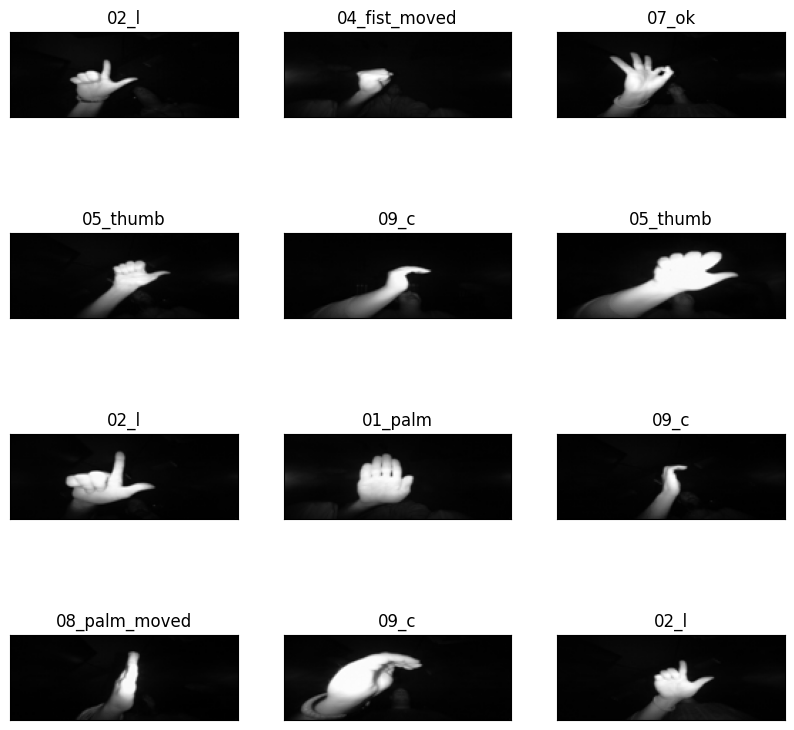

In [11]:
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # I choose a color map gray to distinguish well the gesture
    plt.imshow(x_train[i].reshape(60,160), cmap=plt.cm.gray)     
    plt.title(y_train[i])
plt.show()

## Performing PCA

In this section, we will perform a PCA using the implemented built-in function from scikit-learn in order to reduce the number of dimensions that are present in our data.

In [12]:
# Initializing the PCA
pca = PCA()
pca.n_components = 20
pca_data = pca.fit_transform(x_train)

print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

print('___________________')
print("After PCA",pca_data.shape)

[0.31433442 0.12627524 0.07557459 0.04293479 0.03844397 0.02674057
 0.02395758 0.0216419  0.01955848 0.01602148 0.01411377 0.0133497
 0.01118064 0.01067032 0.01000184 0.00943279 0.00852693 0.00802909
 0.00748743 0.00701846]
[1046.4244   663.2405   513.0974   386.73776  365.9536   305.20895
  288.89056  274.57413  261.0234   236.24535  221.73459  215.64908
  197.35367  192.79718  186.66028  181.27257  172.34885  167.24185
  161.50218  156.3626 ]
___________________
After PCA (14000, 20)


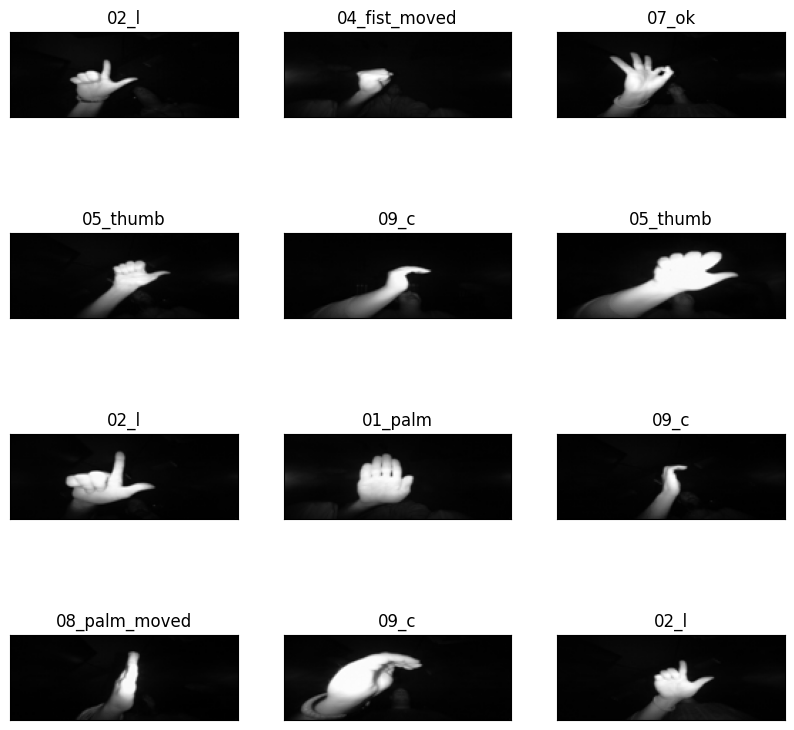

In [13]:
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # I choose a color map gray to distinguish well the gesture
    plt.imshow(x_train[i].reshape(60,160), cmap=plt.cm.gray)     
    plt.title(y_train[i])
plt.show()

**Maybe we can some normalization again** 

Now that we performed the dimensionality reduction with the PCA, we can perform various learning algorithms such as logistic regression, Stochastic Gradient Descent, Ada Boost Regressor (Gradient Descent), Decision Tree, Random Forest and Naive Bayes.

## Logistic Regression

Let's try the logistic regression with different penalty norm 'l1', 'l2', 'elasticnet'.

In [17]:
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=0.01,multi_class='auto',penalty='l2',solver='lbfgs',max_iter=500)
# clf = LogisticRegression(C=0.1,multi_class='auto',penalty='l1',solver='liblinear',max_iter=500)
#clf = LogisticRegression(C=1e5,multi_class='auto',penalty='l1',solver='saga',max_iter=1000)
#clf = LogisticRegression(C=1e5,multi_class='multinomial',penalty='elasticnet',l1_ratio=0.1,solver='saga',tol=0.1)
# fit data
clf.fit(x_train, y_train)
# compute accuracy of the prediction
score = clf.score(x_test, y_test)
print("Test score: %.4f" % score)

c:\Users\alice\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score: 0.9715


**TODO** un tableau recap

* Test score for the norm '**l1**' and the solver '**liblinear**': $0.9552$
* Test score for the norm '**l2**' and the solver '**lbfgs**': $0.9715$